## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer",on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the data from the files after being loaded into dataframe
mouse_metadata.head()
#study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [22]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].count()

1880

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(dup_mice)

['g989']
[]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = mouse_study_df[mouse_study_df['Mouse ID'] == "g989"].index
mouse_study_df.drop(indexNames, inplace=True)
dup_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(dup_mice)
mouse_study_df

[]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_study_df['Mouse ID'].count()

1880

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_volume = mouse_study_df["Tumor Volume (mm3)"].mean()
median_volume = mouse_study_df["Tumor Volume (mm3)"].median()
std_volume = mouse_study_df["Tumor Volume (mm3)"].std(ddof=0)
var_volume = mouse_study_df["Tumor Volume (mm3)"].var(ddof=0)
sem_volume = mouse_study_df["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_grp_volume = mouse_study_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median_grp_volume = mouse_study_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
std_grp_volume = mouse_study_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std(ddof=0)
var_grp_volume = mouse_study_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var(ddof=0)
sem_grp_volume = mouse_study_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_regimen_df = pd.DataFrame({"Mean By Drug Regimen": mean_grp_volume,
                                 "Median By Drug Regimen": median_grp_volume,
                                 "STD By Drug Regimen": std_grp_volume,
                                 "Variance By Drug Regimen": var_grp_volume,
                                  "SEM By Drug Regimen": sem_grp_volume})

summary_regimen_df


,Mean By Drug Regimen,Median By Drug Regimen,STD By Drug Regimen,Variance By Drug Regimen,SEM By Drug Regimen
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.983904,24.839296,0.329346
Ceftamin,52.591172,51.776157,6.250556,39.069446,0.469821
Infubinol,52.884795,51.820584,6.548770,42.886388,0.492236
Ketapril,55.235638,53.698743,8.257659,68.188930,0.603860
Naftisol,54.331565,52.509285,8.112811,65.817708,0.596466
Placebo,54.033581,52.288934,7.799368,60.830138,0.581331
Propriva,52.320930,50.446266,6.599675,43.555716,0.544332
Ramicane,40.216745,40.673236,4.835669,23.383692,0.320955
Stelasyn,54.233149,52.431737,7.689090,59.122106,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'mean',
#                                           'Tumor Volume (mm3)':'median',
#                                           'Tumor Volume (mm3)':'std',
#                                           'Tumor Volume (mm3)':'var'})
agg_func_math = {
    'Tumor Volume (mm3)':
    ['mean', 'median', 'std', 'var']
}
mouse_study_df.groupby(['Drug Regimen']).agg(agg_func_math).round(2)


Tumor Volume (mm3)                    
                           mean median   std    var
Drug Regimen                                       
Capomulin                 40.68  41.56  4.99  24.95
Ceftamin                  52.59  51.78  6.27  39.29
Infubinol                 52.88  51.82  6.57  43.13
Ketapril                  55.24  53.70  8.28  68.55
Naftisol                  54.33  52.51  8.13  66.17
Placebo                   54.03  52.29  7.82  61.17
Propriva                  52.32  50.45  6.62  43.85
Ramicane                  40.22  40.67  4.85  23.49
Stelasyn                  54.23  52.43  7.71  59.45
Zoniferol                 53.24  51.82  6.97  48.53

## Bar and Pie Charts

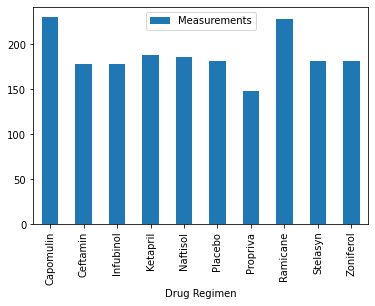

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_study_df.head()
drug_regimen = mouse_study_df["Drug Regimen"].unique()
regimen_count = mouse_study_df.groupby('Drug Regimen')['Mouse ID'].count()
measurements_df = pd.DataFrame({"Drug Regimen": drug_regimen,
                                 "Measurements": regimen_count})
measurements_df

measurements_df.plot(kind="bar")

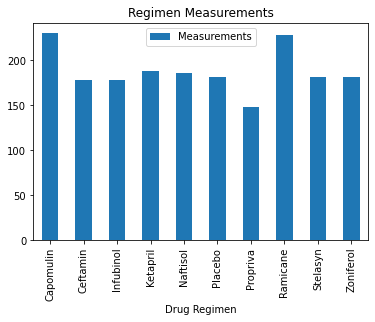

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_plt = measurements_df[['Drug Regimen','Measurements']].plot(kind='bar',title="Regimen Measurements")
plt.show()

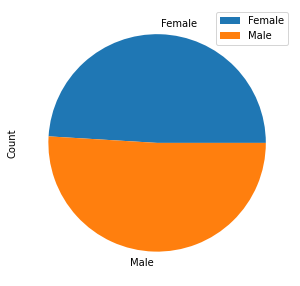

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_study_df["Sex"].unique()
gender_count = mouse_study_df.groupby('Sex')['Mouse ID'].count()

sex_df = pd.DataFrame({"Sex": gender,
                        "Count": gender_count})
sex_df

plot = sex_df.plot.pie(y='Count', figsize=(5,5))

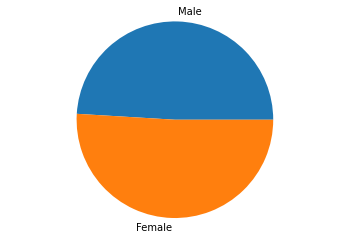

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = 'Male','Female'
gender_counts = sex_df['Count']
plt.pie(gender_counts,labels=pie_labels)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_df = mouse_study_df.loc[(mouse_study_df['Drug Regimen'] == 'Capomulin') | (mouse_study_df['Drug Regimen'] == 'Ramicane') | (mouse_study_df['Drug Regimen'] == 'Infubinol') | (mouse_study_df['Drug Regimen'] == 'Ceftamin')]
final_tumor_capomulin = final_tumor_df[(final_tumor_df['Drug Regimen'] == 'Capomulin')]['Tumor Volume (mm3)'].max()
final_tumor_ramicane = final_tumor_df[(final_tumor_df['Drug Regimen'] == 'Ramicane')]['Tumor Volume (mm3)'].max()
final_tumor_infubinol = final_tumor_df[(final_tumor_df['Drug Regimen'] == 'Infubinol')]['Tumor Volume (mm3)'].max()
final_tumor_ceftamin = final_tumor_df[(final_tumor_df['Drug Regimen'] == 'Ceftamin')]['Tumor Volume (mm3)'].max()
#print(final_tumor_df)
                                     
# Start by getting the last (greatest) timepoint for each mouse
mouse_id = mouse_study_df["Mouse ID"].unique()
max_timepoint = mouse_study_df.groupby('Mouse ID')["Timepoint"].max()
timepoint_df = pd.DataFrame({"Max Timepoint": max_timepoint})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_timepoint_df = pd.merge(mouse_study_df, timepoint_df, how="outer",on="Mouse ID")
last_tumor_vol = mouse_timepoint_df.loc[(mouse_timepoint_df['Timepoint'] == mouse_timepoint_df['Max Timepoint'])]['Tumor Volume (mm3)']
print(last_tumor_vol)

9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1846    45.934712
1849    48.710661
1859    62.754451
1869    65.741070
1879    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = mouse_study_df["Drug Regimen"].unique().tolist()
print(treatment)

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
